# Model to predict the Global Intensity

# import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sb

In [3]:
os.getcwd()

'C:\\Users\\raghu'

# Data loading

In [4]:
os.chdir('D:\ML project')
os.getcwd()

'D:\\ML project'

In [5]:
hpc=pd.read_csv("hpc_breakdowns.csv")

In [6]:
hpc.head()

,Unnamed: 0,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [7]:
hpc.shape

(2049280, 10)

In [8]:
hpc=pd.read_csv("hpc_breakdowns.csv",infer_datetime_format=True,parse_dates=[['Date','Time']], index_col='Date_Time')


In [9]:
hpc

,Unnamed: 0,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date_Time,,,,,,,,
2006-12-16 17:24:00,0,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,1,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,2,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,3,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,4,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...,...
2010-11-26 20:58:00,2075254,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2010-11-26 20:59:00,2075255,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2010-11-26 21:00:00,2075256,0.938,0.000,239.82,3.8,0.0,0.0,0.0


In [10]:
hpc.drop(['Unnamed: 0'],inplace=True,axis=1)

In [11]:
hpc.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.047237e+06,2.048803e+06,2.047249e+06,2.047279e+06,2.047983e+06,2.048070e+06,2.049151e+06
mean,1.091655e+00,1.237129e-01,2.408405e+02,4.627869e+00,1.122227e+00,1.298954e+00,6.458394e+00
std,1.057290e+00,1.127240e-01,3.238838e+00,4.444695e+00,6.153978e+00,5.823372e+00,8.437150e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [12]:
hpc.shape

(2049280, 7)

In [13]:
hpc.dtypes

Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object

In [14]:
hpc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2049280 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtypes: float64(7)
memory usage: 125.1 MB


# Data Analysis

In [15]:
hpc.isnull().sum()#To find if there is any missing value

Global_active_power      2043
Global_reactive_power     477
Voltage                  2031
Global_intensity         2001
Sub_metering_1           1297
Sub_metering_2           1210
Sub_metering_3            129
dtype: int64

Visualize missing data

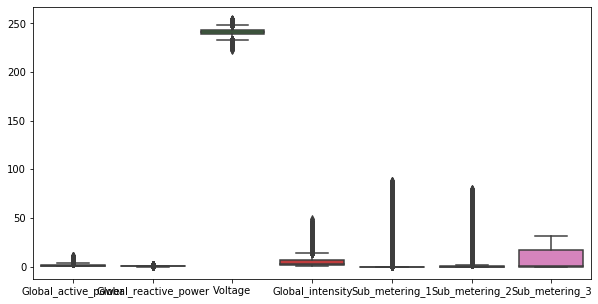

In [16]:
plt.figure(figsize=(10,5))
sb.boxplot(data = hpc)

Remove missing value

In [17]:
for i in range(0,7):        
        hpc.iloc[:,i]=hpc.iloc[:,i].fillna(hpc.iloc[:,i].mean())

In [18]:
hpc.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [19]:
hpc.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091655e+00,1.237129e-01,2.408405e+02,4.627869e+00,1.122227e+00,1.298954e+00,6.458394e+00
std,1.056763e+00,1.127109e-01,3.237233e+00,4.442524e+00,6.152031e+00,5.821653e+00,8.436885e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.040000e-01,1.000000e-01,2.410000e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428800e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


Checking Correlation

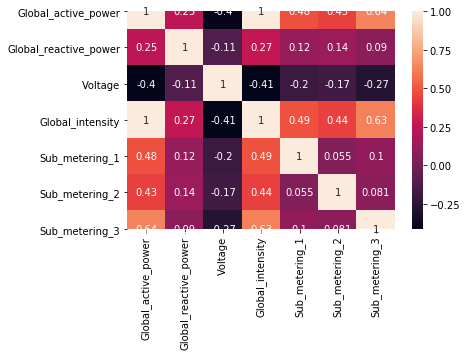

In [20]:
corr = hpc.corr()
sb.heatmap(corr, annot=True)

In [22]:
#resampling Calculate power consumed per month month data

hpc_res = hpc.resample('M').mean()
hpc_res.var()

Global_active_power      0.089421
Global_reactive_power    0.000480
Voltage                  2.417981
Global_intensity         1.481130
Sub_metering_1           0.113990
Sub_metering_2           0.150799
Sub_metering_3           2.355288
dtype: float64

In [23]:
hpc_res.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,1.099316,0.123689,240.854246,4.659706,1.121231,1.303708,6.474409
std,0.299033,0.021902,1.554986,1.217017,0.337624,0.388328,1.534695
min,0.276488,0.087164,235.180782,1.263569,0.086765,0.501135,1.784690
25%,0.965788,0.109515,240.359153,4.144653,0.970688,1.061207,5.612713
50%,1.123354,0.124889,240.879684,4.712009,1.184714,1.256157,6.753966
75%,1.280198,0.131733,241.738879,5.361986,1.307593,1.605991,7.358702
max,1.902314,0.188426,244.083697,8.021025,1.696617,2.346872,10.211667


In [24]:
hpc_res.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date_Time,,,,,,,
2006-12-31,1.902314,0.131386,241.441125,8.021025,1.252769,2.214987,7.409558
2007-01-31,1.546008,0.132676,240.902849,6.548496,1.266726,1.775931,7.383351
2007-02-28,1.401084,0.113637,240.517972,5.915439,1.180217,1.602361,6.703557
2007-03-31,1.317567,0.114747,240.514361,5.572979,1.362047,2.346872,6.504648
2007-04-30,0.891857,0.118778,239.403557,3.825676,1.066256,0.973149,4.800339


In [25]:
hpc_res.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2006-12-31 to 2010-11-30
Freq: M
Data columns (total 7 columns):
Global_active_power      48 non-null float64
Global_reactive_power    48 non-null float64
Voltage                  48 non-null float64
Global_intensity         48 non-null float64
Sub_metering_1           48 non-null float64
Sub_metering_2           48 non-null float64
Sub_metering_3           48 non-null float64
dtypes: float64(7)
memory usage: 3.0 KB


# Pre processing

In [43]:
X = hpc_res.drop('Global_active_power', axis = 1)
y = hpc_res['Global_active_power']

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)  

In [51]:
from sklearn.preprocessing import StandardScaler  

scaler1 = StandardScaler()  
scaler1.fit(X_train)

X_train = scaler1.transform(X_train)  
X_test = scaler1.transform(X_test) 

In [52]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC

In [53]:
svclassifier = SVC(kernel='linear') 
svclassifier.fit(X_train, y_train) 
y_pred = svclassifier.predict(X_test) 

ValueError: Unknown label type: 'continuous'

In [54]:
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print('Training Score: ', knn.score(X_train, y_train))
print('Testing score: ', knn.score(X_test, y_test))

Training Score:  0.9346631224175319
Testing score:  0.772568651262684


In [55]:
from sklearn.metrics import classification_report, confusion_matrix 

In [56]:
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  

ValueError: continuous is not supported